In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import cf_matrix_plot
from sklearn.metrics import confusion_matrix
from keras.preprocessing.image import ImageDataGenerator,load_img,img_to_array

with open('model.pickle','rb') as file:
    model = pickle.load(file)

Using TensorFlow backend.


In [2]:
train_size = 5216 
val_size = 624

val_gen = ImageDataGenerator().flow_from_directory('data/test', target_size=(64, 64), 
                                                   batch_size=val_size, color_mode='grayscale')
val_img,val_labels = next(val_gen)

train_gen = ImageDataGenerator().flow_from_directory('data/train', target_size=(64, 64), 
                                                   batch_size=train_size, color_mode='grayscale')
train_img,train_labels = next(train_gen)

test_gen = ImageDataGenerator().flow_from_directory('data/val', target_size=(64, 64), 
                                                   batch_size=16, color_mode='grayscale')
test_img,test_labels = next(test_gen)


test_unrow = test_img.reshape(16,-1)/255
train_unrow = train_img.reshape(train_size,-1)/255
val_unrow = val_img.reshape(val_size,-1)/255

train_y = train_labels[:,1].T
val_y = val_labels[:,1].T
test_y = test_labels[:,1].T

Found 624 images belonging to 2 classes.
Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [3]:
train_y_hat = model.predict_classes(train_unrow)
test_y_hat = model.predict_classes(test_unrow)
val_y_hat = model.predict_classes(val_unrow)

all_y = np.concatenate((train_y,val_y,test_y))
all_y_hat = np.concatenate((train_y_hat,val_y_hat,test_y_hat))

[[24.98  0.73]
 [ 7.61 66.68]]


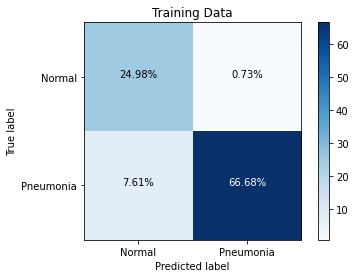

[[37.5  12.5 ]
 [ 6.25 43.75]]


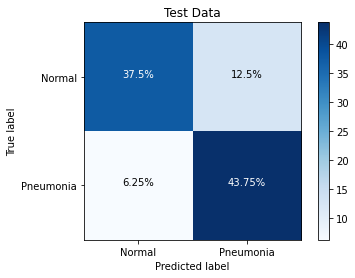

[[25.64 11.86]
 [ 5.45 57.05]]


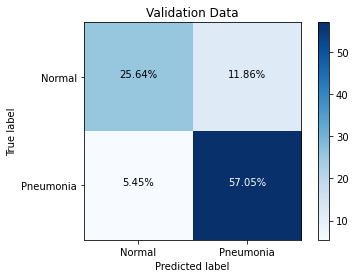

[[25.09  1.95]
 [ 7.38 65.59]]


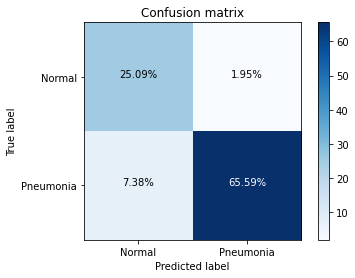

In [4]:
cm_train = confusion_matrix(train_y,train_y_hat)
cf_matrix_plot.main(cm_train,['Normal','Pneumonia'],title='Training Data',normalize=True)

cm_test = confusion_matrix(test_y,test_y_hat)
cf_matrix_plot.main(cm_test,['Normal','Pneumonia'],title='Test Data',normalize=True)

cm_val = confusion_matrix(val_y,val_y_hat)
cf_matrix_plot.main(cm_val,['Normal','Pneumonia'],title='Validation Data',normalize=True)

cm_all = confusion_matrix(all_y,all_y_hat)
cf_matrix_plot.main(cm_all,['Normal','Pneumonia'],normalize=True)

### False negative rate too high, lower threshold

[[23.12  3.91]
 [ 3.26 69.71]]


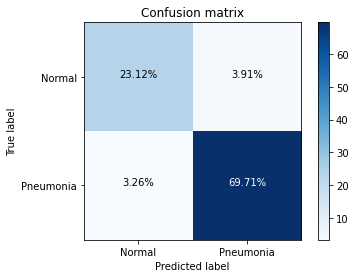

In [9]:
train_y_hat = model.predict(train_unrow)
test_y_hat = model.predict(test_unrow)
val_y_hat = model.predict(val_unrow)

all_y_hat = np.concatenate((train_y_hat,val_y_hat,test_y_hat))
all_y_hat_lt = np.where(all_y_hat>0.3,1,0)

cm_all = confusion_matrix(all_y,all_y_hat_lt)
cf_matrix_plot.main(cm_all,['Normal','Pneumonia'],normalize=True)